In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tag import pos_tag
from nltk import Text

import re
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'xtick.labelcolor':"white", 'ytick.labelcolor':"white", 'axes.titlecolor':"white", 'axes.labelcolor':"white"})

from wordcloud import WordCloud

#### 로그 분석

In [3]:
log = pd.read_csv('localhost_access_log.txt', sep = '\n', header=None)
log.columns = ['log']

In [ ]:
#라인 단위로 읽기
fp = open('localhost_access_log.txt')
for r in fp:
    print( r )
    print('-------------------------')

In [13]:
log

,log
0,0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
1,0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
2,0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
3,0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
4,0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
...,...
1122,192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1123,192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1124,192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1125,192.168.123.239 - - [01/Apr/2016:12:41:23 +090...


#### 1. 전체 로그보기(ip: .. 날짜: .. 뷰페이지: )

In [4]:
log['log']

0       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
1       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
2       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
3       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
4       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
                              ...                        
1122    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1123    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1124    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1125    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1126    192.168.123.244 - - [01/Apr/2016:12:41:24 +090...
Name: log, Length: 1127, dtype: object

#### 2. ip별 방문 횟수( 000.000.000.000:x회)

In [85]:
# re.search('([\d]{1,3}.){3}\d{1,3}', log.loc[400,'log']).group()

'192.168.123.240'

In [ ]:
sr = pd.Series()
sr.str.extract( )

In [15]:
log['log']

0       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
1       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
2       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
3       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
4       0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +090...
                              ...                        
1122    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1123    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1124    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1125    192.168.123.239 - - [01/Apr/2016:12:41:23 +090...
1126    192.168.123.244 - - [01/Apr/2016:12:41:24 +090...
Name: log, Length: 1127, dtype: object

#### 강사추가

In [16]:
ip = log['log'].str.extract('(0:0:0:0:0:0:0:1|([\d]{1,3}.){3}\d{1,3})')[0]

### =====================

In [9]:
log['ip'] = log['log'].apply(lambda x: re.search('0:0:0:0:0:0:0:1|([\d]{1,3}.){3}\d{1,3}',x).group())

In [18]:
log['ip'].value_counts()

192.168.123.231    326
192.168.123.239    187
192.168.123.228    144
192.168.123.240     98
192.168.123.247     54
192.168.123.246     50
192.168.123.229     48
192.168.123.234     31
192.168.123.248     23
192.168.123.25      22
192.168.123.236     19
0:0:0:0:0:0:0:1     18
192.168.123.242     14
192.168.123.249     14
192.168.123.241     14
192.168.123.216     13
192.168.123.23      13
192.168.123.227     13
192.168.123.244      6
192.168.123.243      6
192.168.123.235      5
192.168.123.230      5
192.168.123.232      4
Name: ip, dtype: int64

#### 3. 페이지별 뷰수(ex a.htm:x회 )

#### 강사추가

In [25]:
view = log['log'].str.extract( '(GET|POST) ([\w.-/]+)' )[1]
view.value_counts()

/favicon.ico                                 366
/h1.html                                     233
/h3.html                                     152
/h2.html                                     128
/h4.html                                     102
/bg                                           56
/                                             22
/asf                                          14
/tomcat.css                                   14
/tomcat.png                                   14
/host                                          5
/docs/images/fonts/OpenSans600.woff            2
/docs/images/fonts/OpenSans400.woff            2
/docs/images/fonts/OpenSans700.woff            2
/docs/images/fonts/fonts.css                   2
/docs/                                         2
/docs/images/tomcat.png                        2
/docs/images/asf                               2
/docs/images/fonts/OpenSans400italic.woff      2
/docs/images/docs                              2
/h14.html           

#### =========================

In [88]:
log['log'][0] # 이런 애들은 페이지가 없으니 예외 처리

'0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +0900] "GET / HTTP/1.1" 200 11452'

In [89]:
log['log'][400] # h3.html이 출력되도록

'192.168.123.240 - - [01/Apr/2016:12:40:03 +0900] "GET /h3.html HTTP/1.1" 304 -'

In [90]:
def get_page(log):
    try:
        match = re.search('(GET |POST )/([\w.-]+)',log).group(2) # 파일명에 -도 있으므로
        return match
    except Exception as err:
        return "Not Found"

In [91]:
log['page'] = log['log'].apply(lambda x: get_page(x))

In [92]:
log['page'].value_counts()

favicon.ico      366
h1.html          233
h3.html          152
h2.html          128
h4.html          102
Not Found         22
docs              19
bg-nav.png        14
asf-logo.png      14
tomcat.png        14
bg-upper.png      14
bg-button.png     14
bg-middle.png     14
tomcat.css        14
host-manager       5
h2html             1
h14.html           1
Name: page, dtype: int64

In [95]:
for i,j in zip(log['page'].value_counts().index, log['page'].value_counts().values):
    print(i, ": ", j, "회")

favicon.ico :  366 회
h1.html :  233 회
h3.html :  152 회
h2.html :  128 회
h4.html :  102 회
Not Found :  22 회
docs :  19 회
bg-nav.png :  14 회
asf-logo.png :  14 회
tomcat.png :  14 회
bg-upper.png :  14 회
bg-button.png :  14 회
bg-middle.png :  14 회
tomcat.css :  14 회
host-manager :  5 회
h2html :  1 회
h14.html :  1 회


#### 4. 전체전송바이트 사이즈

#### 강사추가

In [34]:
bsize = log['log'].str.extract( '([\d-]+$)' )[0]
bsize = bsize.replace('-',0).astype( int )
bsize.sum()

9062116

### ==================

In [70]:
log['log'][0]

'0:0:0:0:0:0:0:1 - - [01/Apr/2016:12:37:26 +0900] "GET / HTTP/1.1" 200 11452'

In [71]:
log['log'][400]

'192.168.123.240 - - [01/Apr/2016:12:40:03 +0900] "GET /h3.html HTTP/1.1" 304 -'

In [81]:
def get_byte(log):
    match = re.search('" [\d]{3} ([\d-]+)', log).group(1) # " 200 or 304 ~~~
    if match == '-':
        return 0
    return int(match)

In [82]:
log['byte'] = log['log'].apply(lambda x: get_byte(x))

In [84]:
log['byte'].sum()

9062116

#### 5. 가장많이 방문한 ip 와 방문수를 구하시요

In [30]:
log['ip'].value_counts().head(1)

192.168.123.231    326
Name: ip, dtype: int64

#### 6. 가장 많이 방문한 ip 와 방문수 top 5 를 구하시요.

In [31]:
log['ip'].value_counts().head(5)

192.168.123.231    326
192.168.123.239    187
192.168.123.228    144
192.168.123.240     98
192.168.123.247     54
Name: ip, dtype: int64

#### 7. 페이지별뷰수 와  ip별방문수 를 바차트로 그리시요

#### 7-1. 페이지별 뷰수

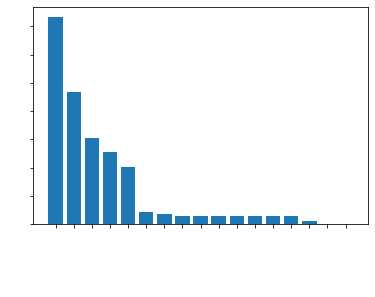

In [63]:
plt.bar(log['page'].value_counts().index, log['page'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

#### 7-2. ip별 방문 수

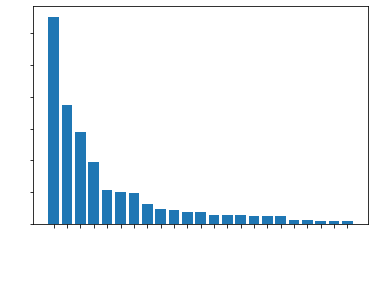

In [65]:
plt.bar(log['ip'].value_counts().index, log['ip'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

#### 8. 페이지별 방문수에 대한 워드 클라우드를 그리시요.

In [68]:
dict(log['page'].value_counts())

{'favicon.ico': 366,
 'h1.html': 233,
 'h3.html': 152,
 'h2.html': 128,
 'h4.html': 102,
 'Not Found': 22,
 'docs': 19,
 'bg-nav.png': 14,
 'asf-logo.png': 14,
 'tomcat.png': 14,
 'bg-upper.png': 14,
 'bg-button.png': 14,
 'bg-middle.png': 14,
 'tomcat.css': 14,
 'host-manager': 5,
 'h2html': 1,
 'h14.html': 1}

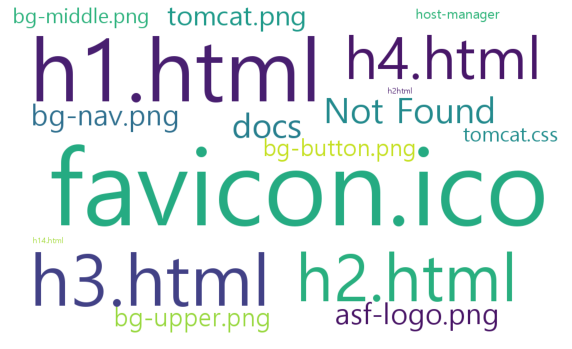

In [69]:
font_path = 'c:\Windows\Fonts\malgun.ttf'
wc = WordCloud( width=1000 , height=600,
               background_color='white',font_path=font_path)
gen = wc.generate_from_frequencies( dict(log['page'].value_counts()) )
plt.figure( figsize=(10,8))
plt.imshow( gen )
plt.axis('off')
plt.show()